In [2]:
# <!-- collapse=True -->
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Régression non-paramétrique: moyenne glissante

Lecture du chapitre 16 du livre _Probabilités, analyses des données et Statistique, Gilbert Saporta_.

à voir: [Nonparametric Regression, Statistical Machine Learning, Spring 2015]( http://www.stat.cmu.edu/~larry/=sml/nonpar.pdf )

Effectuer une moyenne glissante est un bon moyen pour lisser une mesures, et reduire l'influence du bruit. Mais comment choisir la taille de la fenètre ? 

On peut rechercher la taille d'intervalle qui minimise le carré des écarts, mais on obtiendra la taille la plus petite possible (1)...

In [3]:
X = np.linspace(0, 1, 100)

Y0 = 4*np.sin( X*12 ) + 15*X
Y = Y0 + np.random.normal(loc=0.0, scale=1.0, size=len(X))

#Y = np.ones( np.size(X) )

In [4]:
# moyenne glissante **centrée**
def moyenneGlissante( X, Y, k ):
    n = 2*k+1
    S = np.cumsum( np.insert(Y, 0, 0) )
    M = ( S[n:] - S[:-n] )/n
    return X[k:-k], M

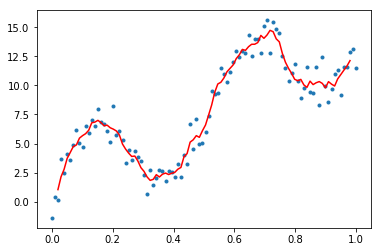

In [5]:
Xm, Ym = moyenneGlissante( X, Y, 2 )

plt.plot( X, Y, "." );
plt.plot( Xm, Ym, "-r" );

In [6]:
def costfun_simple(k):
    Xm, Ym = moyenneGlissante( X, Y, k )
    return np.sum( ( Y[k:-k] - Ym )**2 )

In [7]:
print( [ costfun_simple( k+1 ) for k in range(4) ] )

[74.043287103397759, 77.824222902568238, 83.278950517444329, 86.997444302161938]


Le minimum est bien obtenue pour k=1, ce qui n'as pas d'utilité...

Une astuce consiste à rechercher la taille optimale en retirant de la moyenne la valeur au centre. C'est-à-dire que l'on cherche à estimer la valeur au centre à partir de la valeur des voisins. 

In [8]:
# moyenne glissante **centrée** sans le point centrale
def moyenneGlissante_obliteree( X, Y, k ):
    n = 2*k+1
    S = np.cumsum( np.insert(Y, 0, 0) )
    M = ( S[n:] - S[:-n] - Y[k:-k] )/(n-1)
    return X[k:-k], M

def costfun_obliteree(X, Y, k):
    Xm, Ym = moyenneGlissante_obliteree( X, Y, k )
    return np.sum( ( Y[k:-k] - Ym )**2 )

k_min = 5


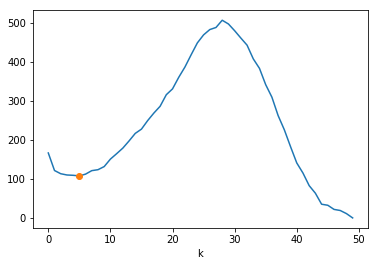

In [9]:
cost = [ costfun_obliteree( X, Y, k+1 ) for k in range(int(len(X)/2)) ]
k_min = np.argmin(cost[:int(len(X)/4)] ) 
print( 'k_min = %i'%k_min )

plt.plot( cost )
plt.plot( k_min, cost[k_min], 'o'  )
plt.xlabel('k');

_remarque: _ c'est un minimum local, pour k de l'ordre du nombre de points total la somme des écarts diminue

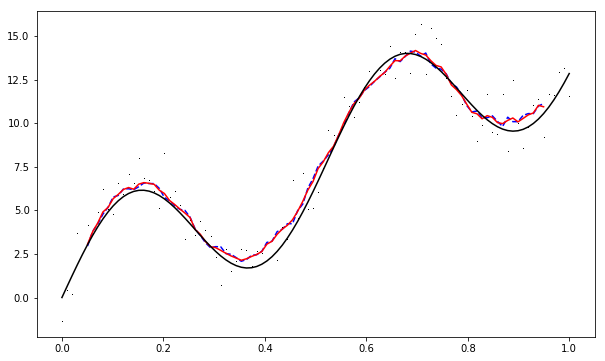

In [10]:
k = k_min

plt.figure( figsize=(10, 6) )
Xm, Ym = moyenneGlissante_obliteree( X, Y, k )
len( Ym ), len( Xm )
plt.plot( Xm, Ym, "--b" );

plt.plot( X, Y, ",k" );
Xm, Ym = moyenneGlissante( X, Y, k )
plt.plot( Xm, Ym, "-r" );

plt.plot( X, Y0, "-k" );

#### Questions
* Avec une regression linéaire glissante ? (ordre 1 ou 2)
* Si plusieurs fréquence dans la fonction ? 

### Résidus

In [11]:
R = Ym - Y[k:-k]

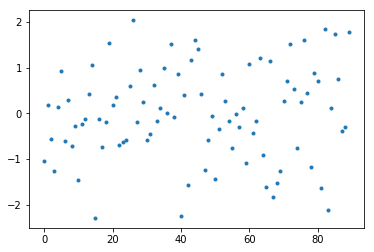

In [20]:
plt.plot( R, '.');

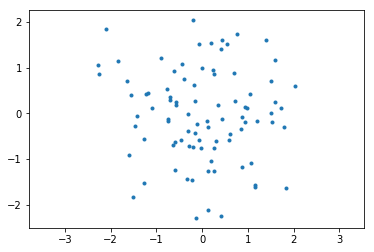

In [21]:
plt.plot(R[1:], R[:-1], '.')
plt.axis('equal');